6.6 Sourcing & Analyzing Time-Series Data

This script contains the following:

1. Importing your libraries and data

2. Subsetting, wrangling, and cleaning time-series data

3. Time series analysis: decomposition

4. Testing for stationarity

5. Stationarizing the Data



1. Importing your libraries and data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") 
plt.style.use('fivethirtyeight') 

Matplotlib is building the font cache; this may take a moment.


In [2]:
# Configure API key 

quandl.ApiConfig.api_key = '86YxymD3jKyHzBsFKuTJ'

In [3]:
# Importing the Euro Area (19 Countries), Gdp Per Person Employed, Index, Seasonally Adjusted , Quarterly variable.

data = quandl.get('OECD/ULC_EEQ_EA19_ULQELP01_IXOBSA_Q')

In [4]:
data.head()

,Value
Date,
1995-03-31,86.05
1995-06-30,86.40
1995-09-30,86.49
1995-12-31,86.60
1996-03-31,86.74


In [5]:
data.shape

(108, 1)

In [6]:
data.columns

Index(['Value'], dtype='object')

In [7]:
type(data)

pandas.core.frame.DataFrame

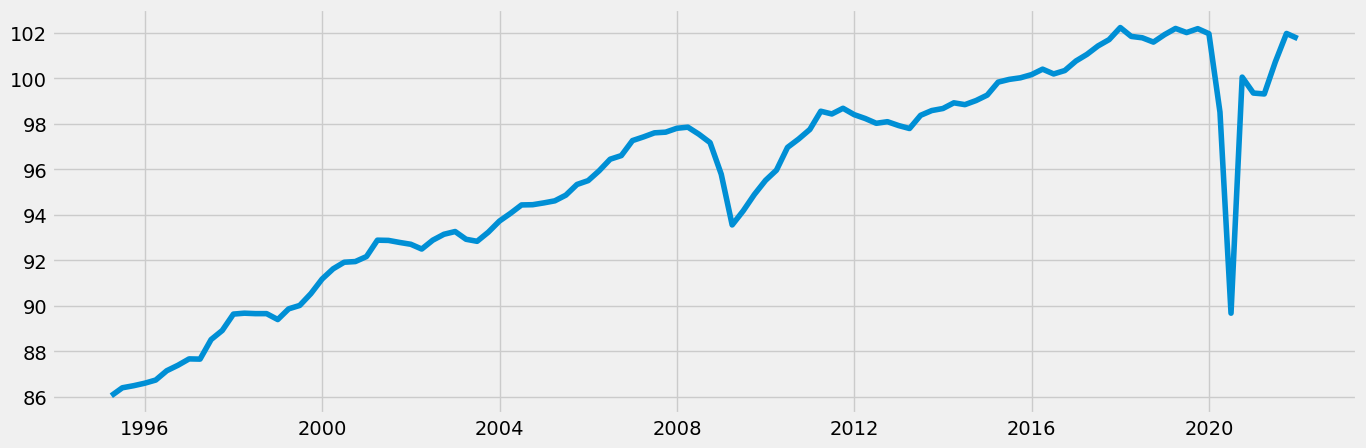

In [8]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) 

plt.plot(data)

2. Subsetting, wrangling, and cleaning time-series data

There is no need to subset the data as it begins from 1996

In [9]:
# Check for missing values

data.isnull().sum()

Value    0
dtype: int64

In [10]:
# Check for duplicates

dups = data.duplicated()
dups.sum()

3

In [12]:
data_dups = data[data.duplicated()]

In [13]:
data_dups

,Value
Date,
1998-09-30,89.66
2002-06-30,92.89
2020-06-30,89.68


3. Time-series analysis: decomposition

In [14]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data, model='additive')

In [15]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

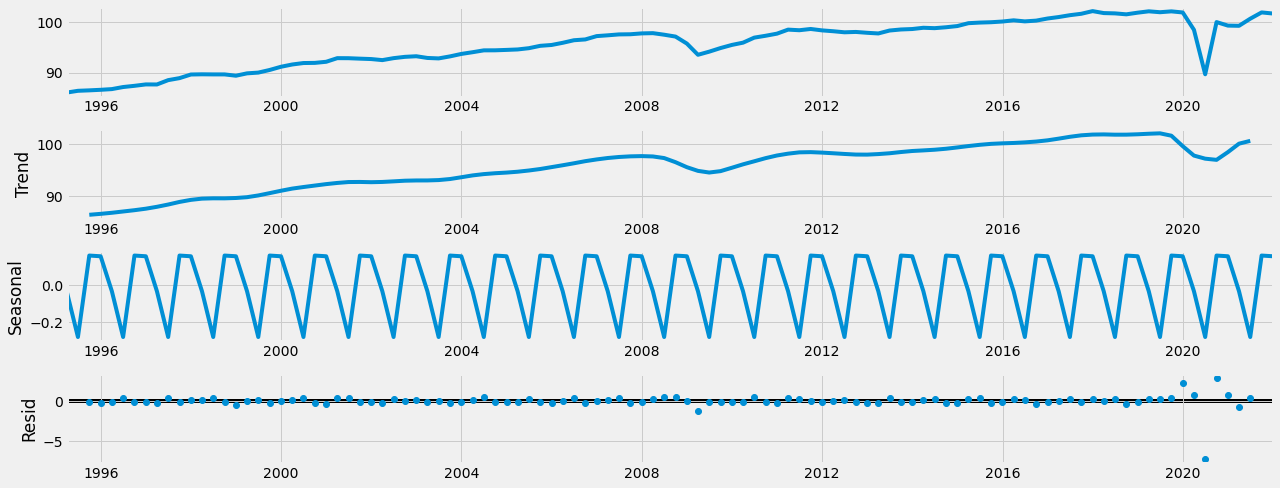

In [16]:
# Plot the separate components

decomposition.plot()
plt.show()

The first chart is the 'level' which includes the data and its components, followed by the underlying trend (showing non stationarity). The trend gradually increases in a linear fashion between 1996 and 2008, there is a fluctuation between 2008 and 2012, followed by an overall increase till 2020 (although a mild of fluctuation between 2012 and 2016. There is a bit of noise between 2020 and 2021. The third component is the seasonality which represent the seasonal fluctuations at regular interval. There isn't much noise except around 2008/2009 and between 2020 and 2021.

4. Testing for stationarity

In [17]:
# Import the adfuller() function
from statsmodels.tsa.stattools import adfuller
# Define the function
def dickey_fuller(timeseries): 
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                  -1.715868
p-value                          0.422956
Number of Lags Used              2.000000
Number of Observations Used    105.000000
Critical Value (1%)             -3.494220
Critical Value (5%)             -2.889485
Critical Value (10%)            -2.581676
dtype: float64


At significance levels of 1%, 5% and 10%, the test statistic is larger than the critical values. This implies that the null hypothesis (that there is a presence of unit root in the data) cannot be rejected. Also, the p-value is much larger than 0.05. The constelation of these reveals that the data is non stationary.

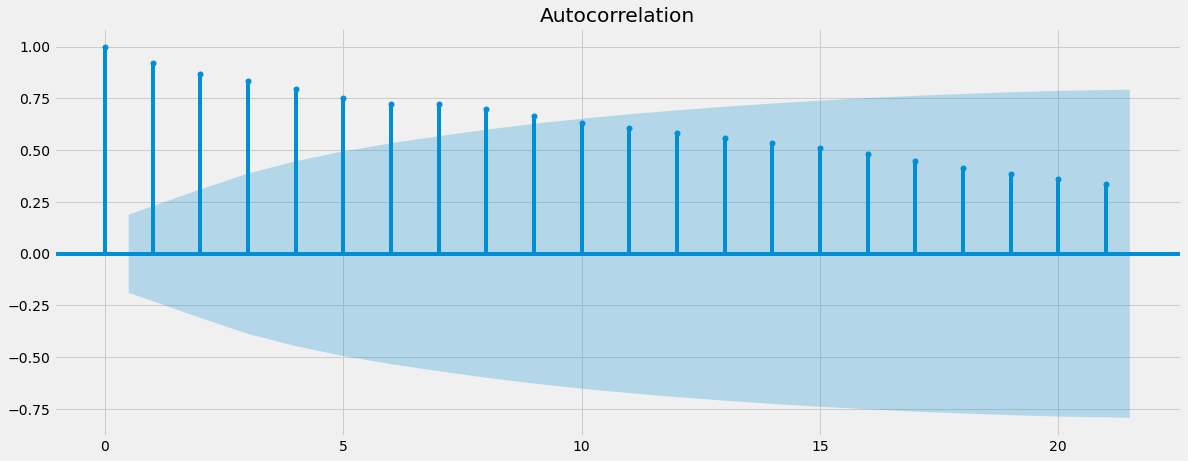

In [18]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data)
plt.show()

There are quite a few lags outside the confidence interval which denotes autocorrelation and non stationarity. This supports the result of the dickey fuller test.

5. Stationarizing the data

In [19]:
data_diff = data - data.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole data t - (t -1)

In [20]:
# Removing the missing values that came about as a result of the differencing in order to run the DF test. 
data_diff.dropna(inplace = True) 

In [21]:
data_diff.head()

,Value
Date,
1995-06-30,0.35
1995-09-30,0.09
1995-12-31,0.11
1996-03-31,0.14
1996-06-30,0.41


In [22]:
data_diff.columns

Index(['Value'], dtype='object')

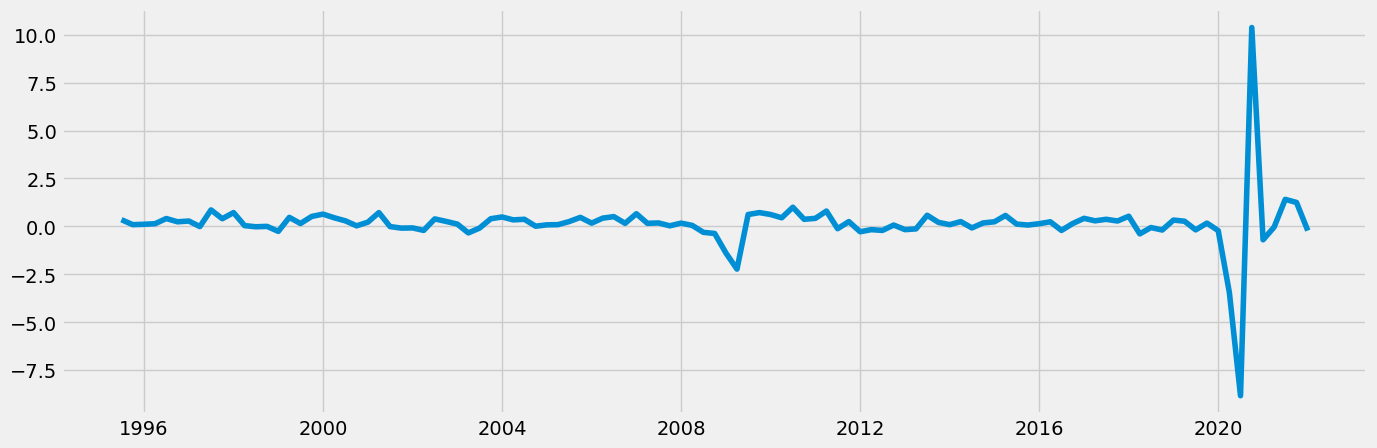

In [23]:
# Checking out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [24]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -1.006017e+01
p-value                        1.340022e-17
Number of Lags Used            1.000000e+00
Number of Observations Used    1.050000e+02
Critical Value (1%)           -3.494220e+00
Critical Value (5%)           -2.889485e+00
Critical Value (10%)          -2.581676e+00
dtype: float64


The data is still non stationary as the test stattistic is still larger than all critcal values, p-value is still larger than 0.05

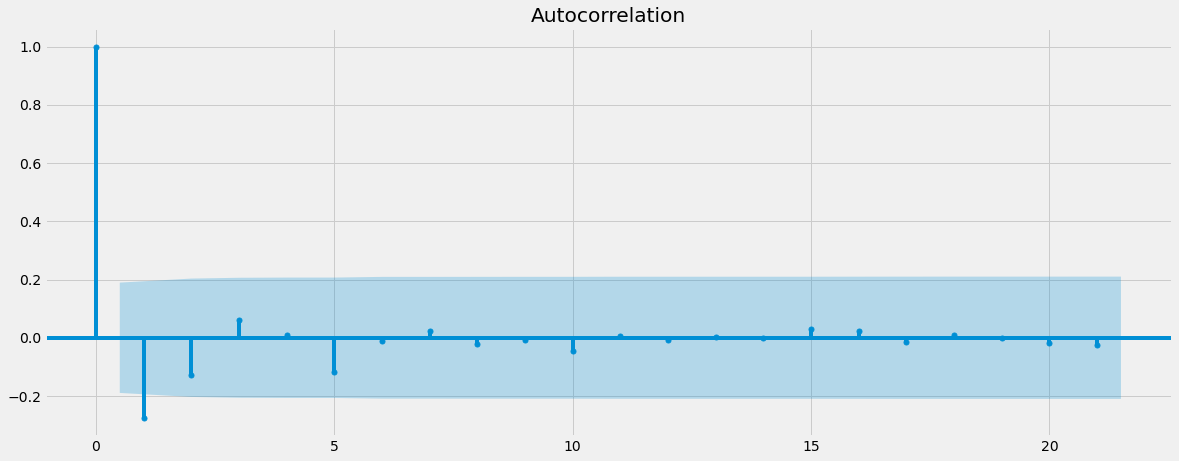

In [25]:
plot_acf(data_diff)
plt.show()

Another round of differencing

In [26]:
data_diff_2 = data_diff - data_diff.shift(1)

In [27]:
# Removing the missing values that came about as a result of the differencing in order to run the DF test. 
data_diff_2.dropna(inplace = True) 

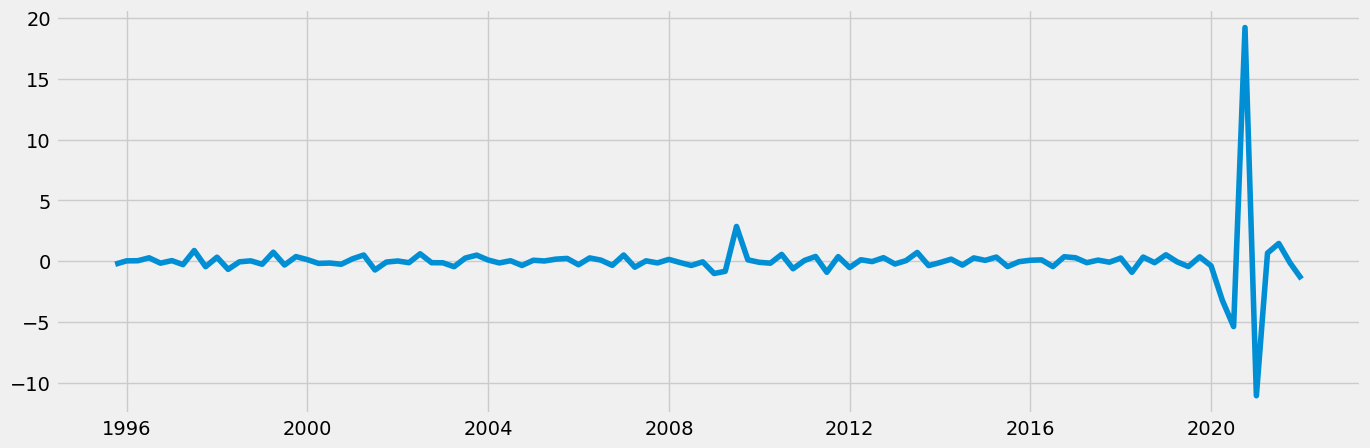

In [28]:
# Checking out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff_2)

In [29]:
dickey_fuller(data_diff_2)

Dickey-Fuller Stationarity test:
Test Statistic                -7.150289e+00
p-value                        3.154096e-10
Number of Lags Used            5.000000e+00
Number of Observations Used    1.000000e+02
Critical Value (1%)           -3.497501e+00
Critical Value (5%)           -2.890906e+00
Critical Value (10%)          -2.582435e+00
dtype: float64


The critical values at both 5% and 10% are now larger than the test statistic but there is still an unsatisfactory p-value.